## 0. Instructions for running following code:
1. Ensure 'letter-recognition.data' is in the 'data' folder.
2. Ensure you have all the required libraries installed.
3. Select a python kernel and run all cells.

## 1. Import data and split into train and test sets

In [1]:
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# Load your dataset
file_path = 'data/letter-recognition.data'
data = pd.read_csv(file_path, header=None)

# print the information of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## 2. Use ***k-nearest neighbours*** to predict the letters.

#### Without dimensionality reduction

CV Results for H vs K for kNN without Dimension Reduction
               params  mean_test_score  rank_test_score
2  {'n_neighbors': 3}         0.939623                1
0  {'n_neighbors': 1}         0.937736                2
4  {'n_neighbors': 5}         0.933962                3
3  {'n_neighbors': 4}         0.928302                4
1  {'n_neighbors': 2}         0.920755                5


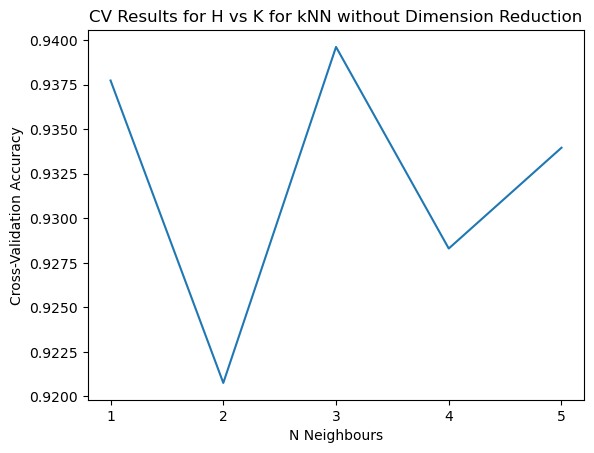

Validation Accuracy: 0.9797
Training Time: 0.79 seconds

CV Results for M vs Y for kNN without Dimension Reduction
               params  mean_test_score  rank_test_score
0  {'n_neighbors': 1}         0.999119                1
4  {'n_neighbors': 5}         0.998238                2
1  {'n_neighbors': 2}         0.997357                3
2  {'n_neighbors': 3}         0.997357                3
3  {'n_neighbors': 4}         0.997357                3


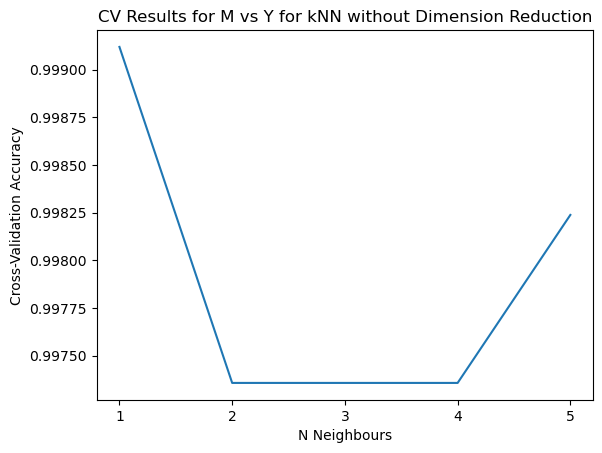

Validation Accuracy: 1.0000
Training Time: 0.84 seconds

CV Results for X vs O for kNN without Dimension Reduction
               params  mean_test_score  rank_test_score
0  {'n_neighbors': 1}         1.000000                1
1  {'n_neighbors': 2}         0.998198                2
2  {'n_neighbors': 3}         0.998198                2
3  {'n_neighbors': 4}         0.998198                2
4  {'n_neighbors': 5}         0.997297                5


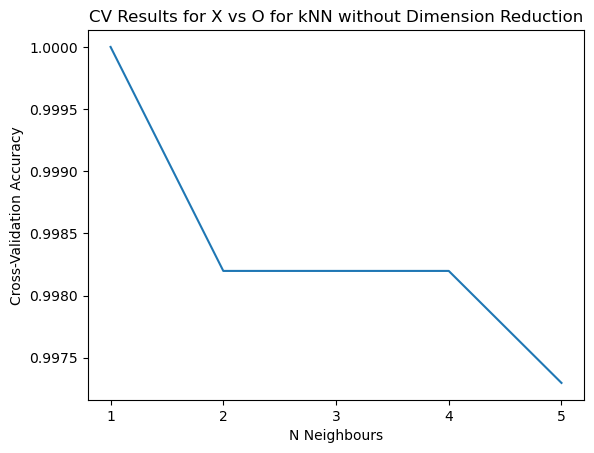

Validation Accuracy: 1.0000
Training Time: 0.93 seconds



In [3]:
from sklearn.neighbors import KNeighborsClassifier 

def tune_train_and_plot(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data into training and final validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

    # Further split the training data for cross-validation
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # kNN Classifier
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

    # Measure training time for complexity
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for kNN without Dimension Reduction")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])
    
    # Plotting
    plt.plot(param_grid['n_neighbors'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('N Neighbours')
    plt.xticks([1, 2, 3, 4, 5])
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for kNN
param_grid = {'n_neighbors': [1, 2, 3, 4, 5]}

# Tune, train and plot for each pair
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    tune_train_and_plot(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for kNN without Dimension Reduction")

#### With dimensionality reduction

CV Results for H vs K for kNN with PCA
               params  mean_test_score  rank_test_score
3  {'n_neighbors': 4}         0.876415                1
1  {'n_neighbors': 2}         0.873585                2
4  {'n_neighbors': 5}         0.868868                3
2  {'n_neighbors': 3}         0.864151                4
0  {'n_neighbors': 1}         0.858491                5


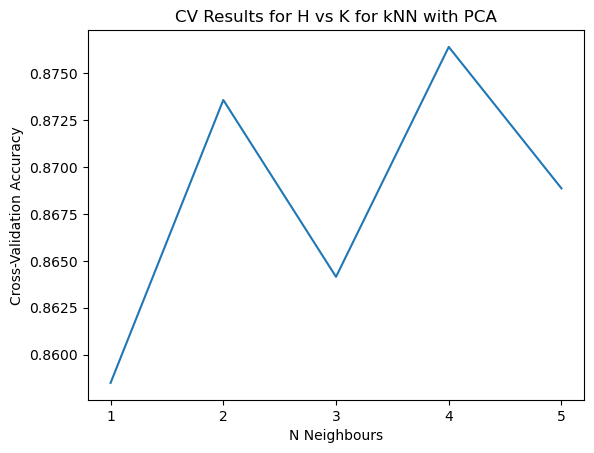

Validation Accuracy: 0.9324
Training Time: 0.53 seconds

CV Results for M vs Y for kNN with PCA
               params  mean_test_score  rank_test_score
0  {'n_neighbors': 1}         0.980632                1
3  {'n_neighbors': 4}         0.979751                2
2  {'n_neighbors': 3}         0.978870                3
4  {'n_neighbors': 5}         0.977108                4
1  {'n_neighbors': 2}         0.976231                5


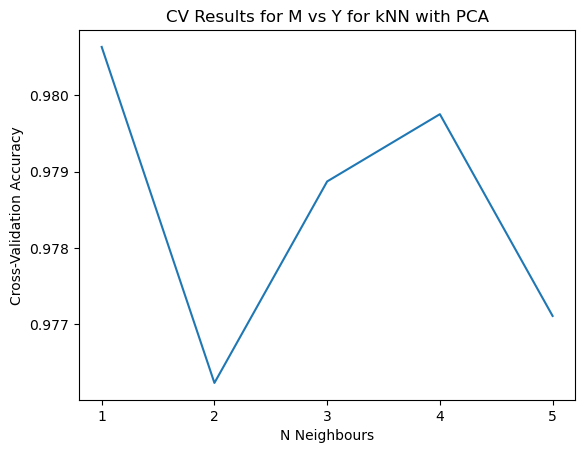

Validation Accuracy: 0.9557
Training Time: 0.56 seconds

CV Results for X vs O for kNN with PCA
               params  mean_test_score  rank_test_score
0  {'n_neighbors': 1}         0.978317                1
1  {'n_neighbors': 2}         0.975623                2
3  {'n_neighbors': 4}         0.972920                3
4  {'n_neighbors': 5}         0.972015                4
2  {'n_neighbors': 3}         0.969316                5


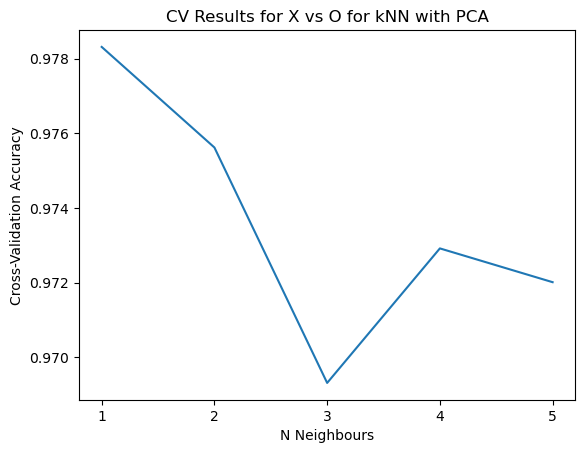

Validation Accuracy: 0.9805
Training Time: 0.51 seconds



In [4]:
# Function to perform hyperparameter tuning, training and plotting with PCA
def tune_train_and_plot_with_pca(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Apply PCA
    pca = PCA(n_components=4)
    X_train_cv_pca = pca.fit_transform(X_train_cv)
    X_val_pca = pca.transform(X_val)

    # kNN Classifier
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

    # Start timing
    start_time = time.time()
    grid_search.fit(X_train_cv_pca, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for kNN with PCA")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting
    n_neighbors = param_grid['n_neighbors']
    plt.plot(n_neighbors, grid_search.cv_results_['mean_test_score'])
    plt.xlabel('N Neighbours')
    plt.xticks([1, 2, 3, 4, 5])
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    X_train_pca = pca.transform(X_train)
    best_estimator.fit(X_train_pca, y_train)
    val_predictions = best_estimator.predict(X_val_pca)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Tune, train and plot for each pair with PCA
for pair in pairs:
    tune_train_and_plot_with_pca(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for kNN with PCA")

## 3. Use ***Artificial Neural Network*** to predict the letters.

#### Without dimensionality reduction

CV Results for H vs K for ANN without Dimension Reduction
                          params  mean_test_score  rank_test_score
2  {'hidden_layer_sizes': (10,)}         0.664151                1
3  {'hidden_layer_sizes': (12,)}         0.571698                2
1   {'hidden_layer_sizes': (5,)}         0.506604                3
0   {'hidden_layer_sizes': (2,)}         0.500943                4
4  {'hidden_layer_sizes': (15,)}         0.394340                5


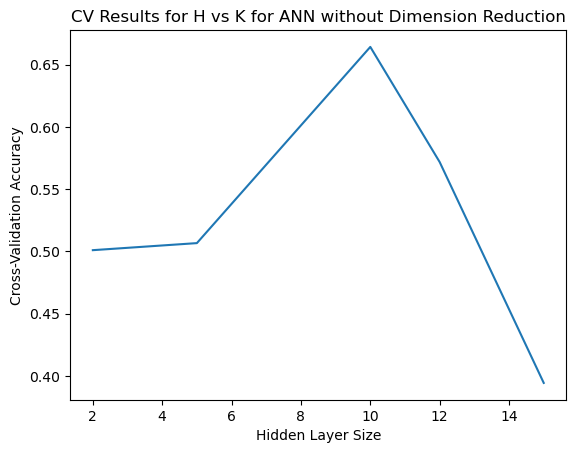

Validation Accuracy: 0.6757
Training Time: 0.95 seconds

CV Results for M vs Y for ANN without Dimension Reduction
                          params  mean_test_score  rank_test_score
2  {'hidden_layer_sizes': (10,)}         0.823074                1
3  {'hidden_layer_sizes': (12,)}         0.763204                2
1   {'hidden_layer_sizes': (5,)}         0.627661                3
4  {'hidden_layer_sizes': (15,)}         0.439273                4
0   {'hidden_layer_sizes': (2,)}         0.395239                5


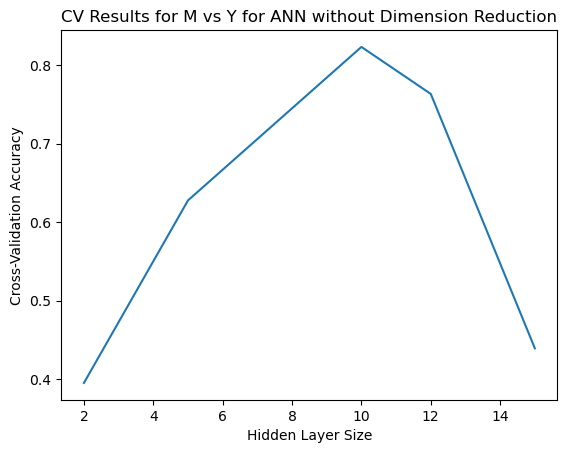

Validation Accuracy: 0.8481
Training Time: 0.90 seconds

CV Results for X vs O for ANN without Dimension Reduction
                          params  mean_test_score  rank_test_score
2  {'hidden_layer_sizes': (10,)}         0.715723                1
3  {'hidden_layer_sizes': (12,)}         0.630896                2
1   {'hidden_layer_sizes': (5,)}         0.528833                3
0   {'hidden_layer_sizes': (2,)}         0.483759                4
4  {'hidden_layer_sizes': (15,)}         0.478342                5


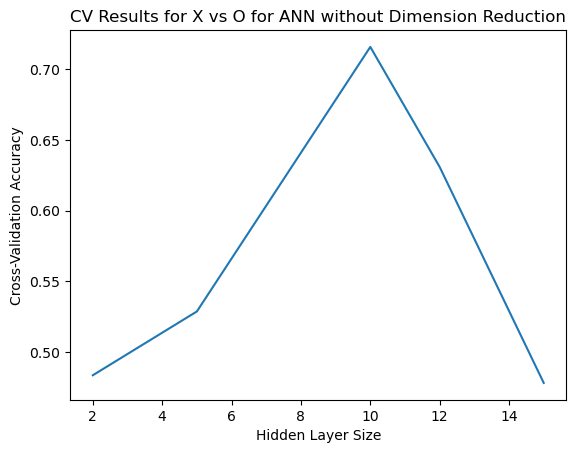

Validation Accuracy: 0.6494
Training Time: 0.91 seconds



In [5]:
from sklearn.neural_network import MLPClassifier

def tune_train_and_plot(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data into training and final validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

    # Further split the training data for cross-validation
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # ANN Classifier
    ann = MLPClassifier(random_state=42, learning_rate_init=1e-7)
    grid_search = GridSearchCV(ann, param_grid, cv=5, scoring='accuracy')

    # Measure training time for complexity
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for ANN without Dimension Reduction")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])
    
    # Plotting
    plt.plot(param_grid['hidden_layer_sizes'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Hidden Layer Size')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for ANN
param_grid = {'hidden_layer_sizes': [(2,), (5,), (10,), (12,), (15,)]}

# Tune, train and plot for each pair
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    tune_train_and_plot(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for ANN without Dimension Reduction")

#### With dimensionality reduction

CV Results for H vs K for Random Forest with PCA
                               params  mean_test_score  rank_test_score
3  {'ann__hidden_layer_sizes': (12,)}         0.698113                1
2  {'ann__hidden_layer_sizes': (10,)}         0.594340                2
0   {'ann__hidden_layer_sizes': (2,)}         0.564151                3
1   {'ann__hidden_layer_sizes': (5,)}         0.470755                4
4  {'ann__hidden_layer_sizes': (15,)}         0.468868                5


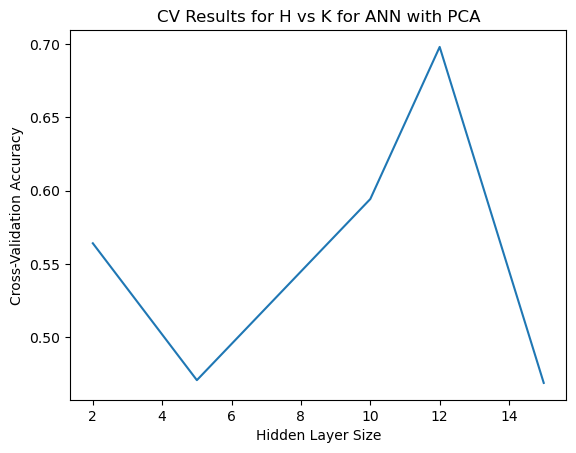

Validation Accuracy: 0.72
Training Time: 1.17 seconds

CV Results for M vs Y for Random Forest with PCA
                               params  mean_test_score  rank_test_score
4  {'ann__hidden_layer_sizes': (15,)}         0.610917                1
1   {'ann__hidden_layer_sizes': (5,)}         0.547508                2
3  {'ann__hidden_layer_sizes': (12,)}         0.531672                3
2  {'ann__hidden_layer_sizes': (10,)}         0.477085                4
0   {'ann__hidden_layer_sizes': (2,)}         0.435737                5


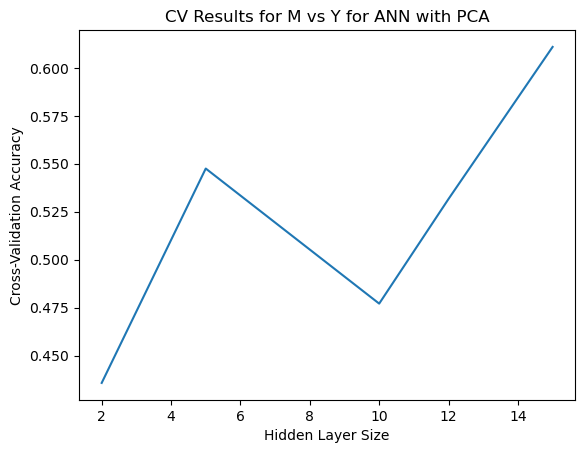

Validation Accuracy: 0.56
Training Time: 1.23 seconds

CV Results for X vs O for Random Forest with PCA
                               params  mean_test_score  rank_test_score
4  {'ann__hidden_layer_sizes': (15,)}         0.535200                1
2  {'ann__hidden_layer_sizes': (10,)}         0.491916                2
1   {'ann__hidden_layer_sizes': (5,)}         0.448551                3
0   {'ann__hidden_layer_sizes': (2,)}         0.403522                4
3  {'ann__hidden_layer_sizes': (12,)}         0.312315                5


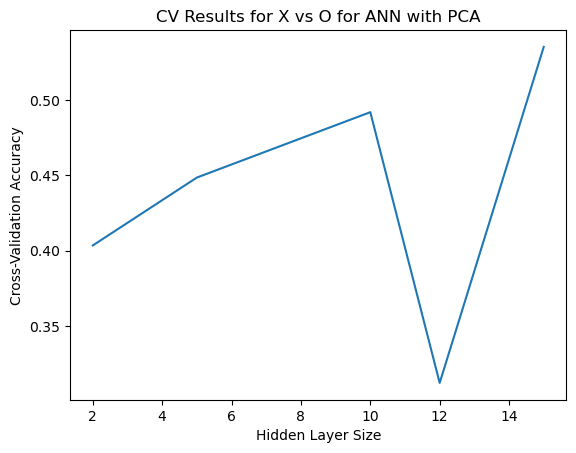

Validation Accuracy: 0.47
Training Time: 1.17 seconds



In [6]:
def tune_train_and_plot_with_dim_reduction(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define a pipeline with PCA dimension reduction and ANN Classifier
    pipeline = Pipeline([
        ('reducer', PCA(n_components=4)),
        ('ann', MLPClassifier(random_state=42, learning_rate_init=1e-7))
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    
    # Measure training time for complexity
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    cv_results[['params', 'mean_test_score', 'rank_test_score']]
    print("CV Results for", pair[0], "vs", pair[1], "for Random Forest with PCA")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting the results
    plt.plot(param_grid['ann__hidden_layer_sizes'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Hidden Layer Size')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for pipeline
param_grid_with_dim_reduction = {'ann__hidden_layer_sizes': [(2,), (5,), (10,), (12,), (15,)]}

# Tune, train and plot for each pair with dimension reduction using PCA
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    for method in ['PCA']:
        tune_train_and_plot_with_dim_reduction(data, pair, param_grid_with_dim_reduction, f"CV Results for {pair[0]} vs {pair[1]} for ANN with PCA")

## 4. Use ***Decision Tree*** to predict the letters.

#### Without dimensionality reduction

CV Results for H vs K for ANN without Dimension Reduction
                      params  mean_test_score  rank_test_score
0      {'criterion': 'gini'}         0.933019                1
1   {'criterion': 'entropy'}         0.916038                2
2  {'criterion': 'log_loss'}         0.916038                2


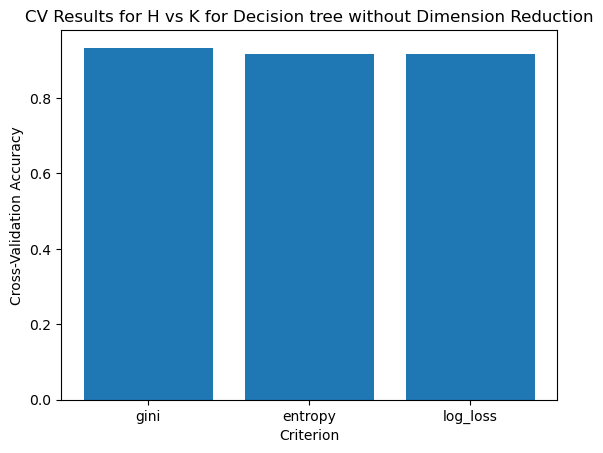

Validation Accuracy: 1.0000
Training Time: 0.18 seconds

CV Results for M vs Y for ANN without Dimension Reduction
                      params  mean_test_score  rank_test_score
0      {'criterion': 'gini'}         0.987665                1
1   {'criterion': 'entropy'}         0.986803                2
2  {'criterion': 'log_loss'}         0.986803                2


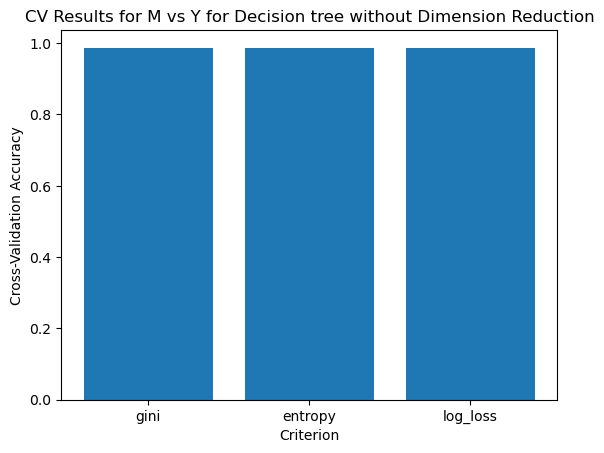

Validation Accuracy: 0.9873
Training Time: 0.16 seconds

CV Results for X vs O for ANN without Dimension Reduction
                      params  mean_test_score  rank_test_score
1   {'criterion': 'entropy'}         0.993694                1
2  {'criterion': 'log_loss'}         0.993694                1
0      {'criterion': 'gini'}         0.992789                3


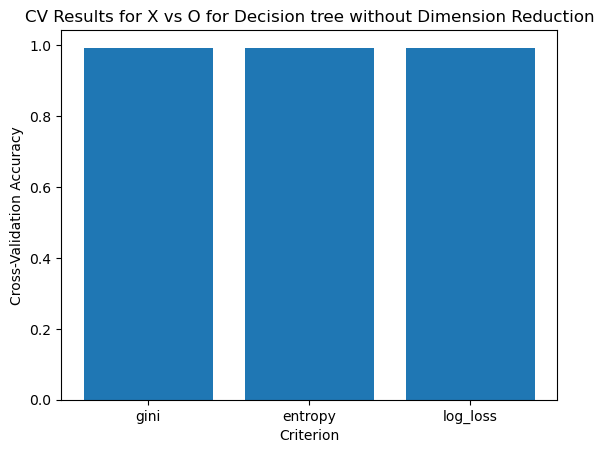

Validation Accuracy: 1.0000
Training Time: 0.14 seconds



In [7]:
from sklearn.tree import DecisionTreeClassifier

def tune_train_and_plot(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data into training and final validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

    # Further split the training data for cross-validation
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

    # Measure training time for complexity
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for ANN without Dimension Reduction")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])
    
    # Plotting
    plt.bar(param_grid['criterion'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Criterion')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for Decision tree
param_grid = {'criterion': ['gini', 'entropy', 'log_loss']}

# Tune, train and plot for each pair
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    tune_train_and_plot(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for Decision tree without Dimension Reduction")

#### With dimensionality reduction

CV Results for H vs K for Random Forest with PCA
                          params  mean_test_score  rank_test_score
1   {'dt__criterion': 'entropy'}         0.845283                1
2  {'dt__criterion': 'log_loss'}         0.845283                1
0      {'dt__criterion': 'gini'}         0.839623                3


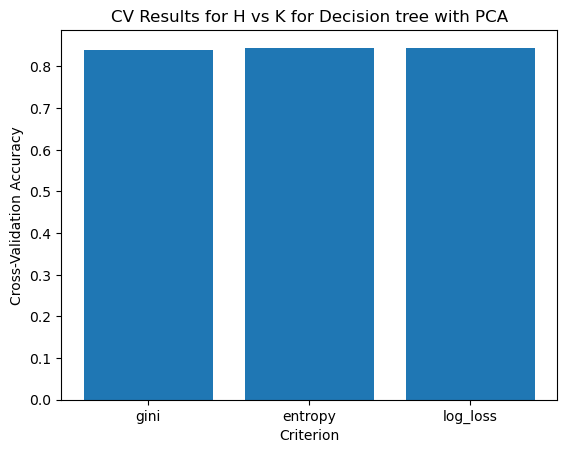

Validation Accuracy: 0.91
Training Time: 0.33 seconds

CV Results for M vs Y for Random Forest with PCA
                          params  mean_test_score  rank_test_score
0      {'dt__criterion': 'gini'}         0.972714                1
1   {'dt__criterion': 'entropy'}         0.969182                2
2  {'dt__criterion': 'log_loss'}         0.969182                2


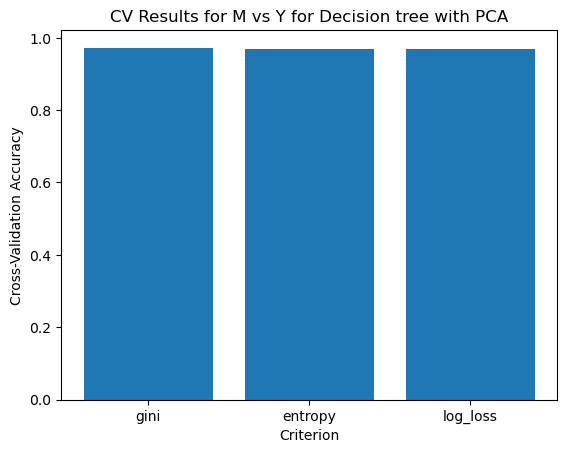

Validation Accuracy: 0.97
Training Time: 0.29 seconds

CV Results for X vs O for Random Forest with PCA
                          params  mean_test_score  rank_test_score
1   {'dt__criterion': 'entropy'}         0.975639                1
2  {'dt__criterion': 'log_loss'}         0.975639                1
0      {'dt__criterion': 'gini'}         0.968415                3


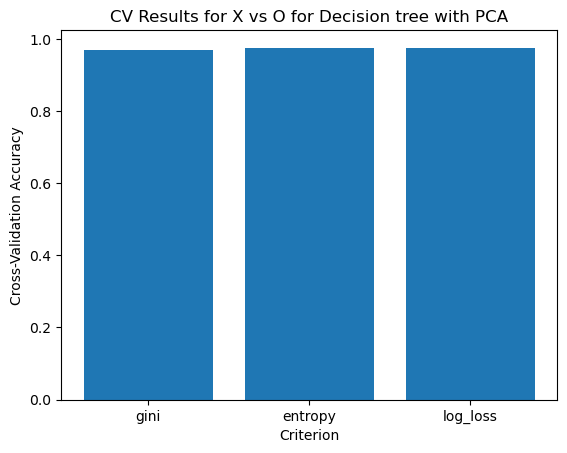

Validation Accuracy: 1.00
Training Time: 0.28 seconds



In [8]:
def tune_train_and_plot_with_dim_reduction(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define a pipeline with PCA dimension reduction and Decision Tree Classifier
    pipeline = Pipeline([
        ('reducer', PCA(n_components=4)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    
    # Measure training time for complexity
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    cv_results[['params', 'mean_test_score', 'rank_test_score']]
    print("CV Results for", pair[0], "vs", pair[1], "for Random Forest with PCA")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting the results
    plt.bar(param_grid['dt__criterion'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Criterion')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for pipeline
param_grid_with_dim_reduction = {'dt__criterion': ['gini', 'entropy', 'log_loss']}

# Tune, train and plot for each pair with dimension reduction using PCA
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    for method in ['PCA']:
        tune_train_and_plot_with_dim_reduction(data, pair, param_grid_with_dim_reduction, f"CV Results for {pair[0]} vs {pair[1]} for Decision tree with PCA")

## 5. Use ***Random Forest*** to predict the letters.

#### Without dimensionality reduction

CV Results for H vs K for Random Forest without Dimension Reduction
                  params  mean_test_score  rank_test_score
2  {'n_estimators': 100}         0.958491                1
3  {'n_estimators': 150}         0.956604                2
1   {'n_estimators': 50}         0.955660                3
4  {'n_estimators': 200}         0.954717                4
0   {'n_estimators': 10}         0.938679                5


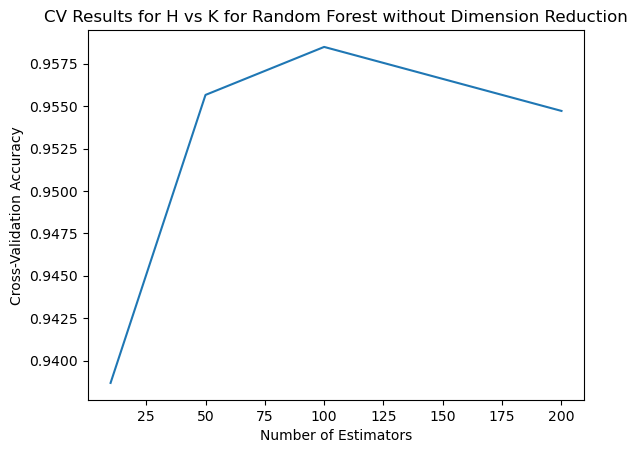

Validation Accuracy: 1.0000
Training Time: 6.65 seconds

CV Results for M vs Y for Random Forest without Dimension Reduction
                  params  mean_test_score  rank_test_score
3  {'n_estimators': 150}         0.996476                1
4  {'n_estimators': 200}         0.996476                1
1   {'n_estimators': 50}         0.995595                3
2  {'n_estimators': 100}         0.995595                3
0   {'n_estimators': 10}         0.994718                5


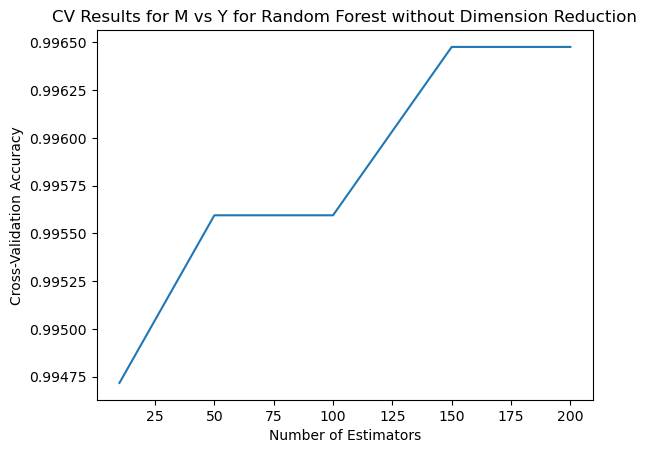

Validation Accuracy: 0.9937
Training Time: 6.08 seconds

CV Results for X vs O for Random Forest without Dimension Reduction
                  params  mean_test_score  rank_test_score
1   {'n_estimators': 50}         0.999099                1
2  {'n_estimators': 100}         0.999099                1
3  {'n_estimators': 150}         0.999099                1
4  {'n_estimators': 200}         0.999099                1
0   {'n_estimators': 10}         0.998198                5


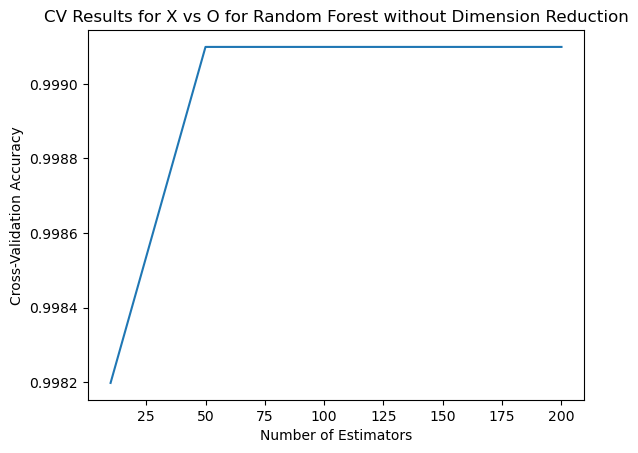

Validation Accuracy: 1.0000
Training Time: 5.86 seconds



In [9]:
from sklearn.ensemble import RandomForestClassifier

# Function to perform hyperparameter tuning, training and plotting
def tune_train_and_plot(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data into training and final validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

    # Further split the training data for cross-validation
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

    # Start timing
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    # Measure training time
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    cv_results[['params', 'mean_test_score', 'rank_test_score']]
    print("CV Results for", pair[0], "vs", pair[1], "for Random Forest without Dimension Reduction")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting
    plt.plot(param_grid['n_estimators'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Number of Estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for pipeline
param_grid = {'n_estimators': [10, 50, 100, 150, 200]}

# Tune, train and plot for each pair
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    tune_train_and_plot(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for Random Forest without Dimension Reduction")

#### With dimensionality reduction

CV Results for H vs K for Random Forest with PCA
                      params  mean_test_score  rank_test_score
2  {'rf__n_estimators': 100}         0.870755                1
1   {'rf__n_estimators': 50}         0.864151                2
4  {'rf__n_estimators': 200}         0.864151                2
3  {'rf__n_estimators': 150}         0.862264                4
0   {'rf__n_estimators': 10}         0.859434                5


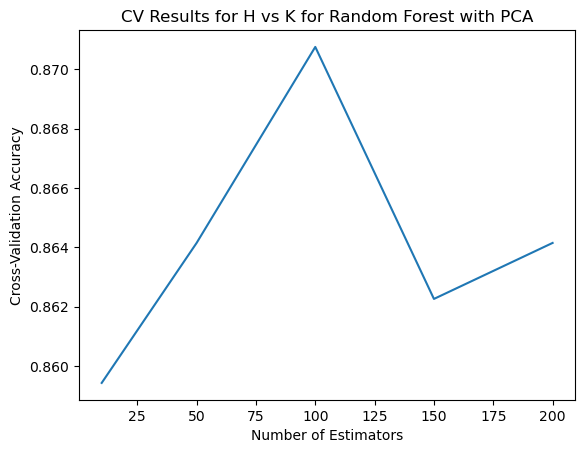

Validation Accuracy: 0.95
Training Time: 10.42 seconds

CV Results for M vs Y for Random Forest with PCA
                      params  mean_test_score  rank_test_score
0   {'rf__n_estimators': 10}         0.977985                1
4  {'rf__n_estimators': 200}         0.977985                1
1   {'rf__n_estimators': 50}         0.977981                3
2  {'rf__n_estimators': 100}         0.977981                3
3  {'rf__n_estimators': 150}         0.977104                5


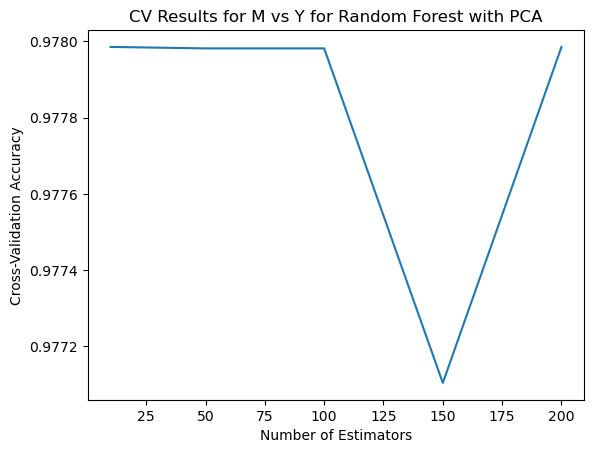

Validation Accuracy: 0.99
Training Time: 8.95 seconds

CV Results for X vs O for Random Forest with PCA
                      params  mean_test_score  rank_test_score
2  {'rf__n_estimators': 100}         0.981053                1
1   {'rf__n_estimators': 50}         0.981048                2
3  {'rf__n_estimators': 150}         0.980148                3
4  {'rf__n_estimators': 200}         0.980148                3
0   {'rf__n_estimators': 10}         0.975631                5


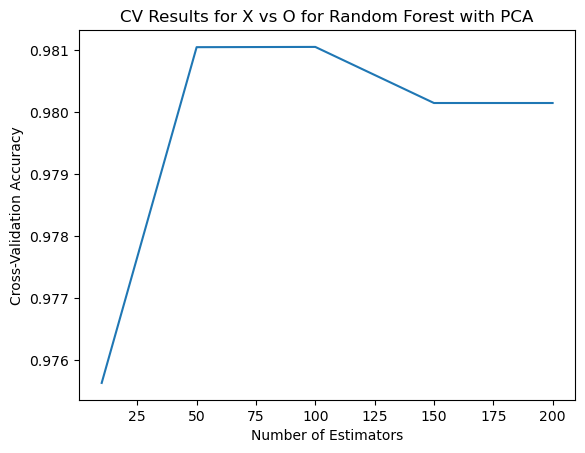

Validation Accuracy: 1.00
Training Time: 9.01 seconds



In [10]:
def tune_train_and_plot_with_dim_reduction(data, pair, param_grid, plot_title, reduction_method):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define a pipeline with dimension reduction and Random Forest Classifier
    if reduction_method == 'PCA':
        reducer = PCA(n_components=4)
    
    pipeline = Pipeline([
        ('reducer', reducer),
        ('rf', RandomForestClassifier(random_state=42))
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    
    # Measure training time for complexity
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    cv_results[['params', 'mean_test_score', 'rank_test_score']]
    print("CV Results for", pair[0], "vs", pair[1], "for Random Forest with", reduction_method)
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting the results
    plt.plot(param_grid['rf__n_estimators'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Number of Estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(f"{plot_title} with {reduction_method}")
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for pipeline
param_grid_with_dim_reduction = {'rf__n_estimators': [10, 50, 100, 150, 200]}

# Tune, train and plot for each pair with dimension reduction using PCA
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    for method in ['PCA']:
        tune_train_and_plot_with_dim_reduction(data, pair, param_grid_with_dim_reduction, f"CV Results for {pair[0]} vs {pair[1]} for Random Forest", method)

## 6. Use ***Naïve Bayes Classifier*** to predict the letters.

#### Without dimensionality reduction

CV Results for H vs K for Naïve Bayes without Dimension Reduction
                     params  mean_test_score  rank_test_score
0  {'var_smoothing': 1e-09}         0.832075                1
1  {'var_smoothing': 1e-08}         0.832075                1
2  {'var_smoothing': 1e-07}         0.832075                1
3  {'var_smoothing': 1e-06}         0.832075                1
4  {'var_smoothing': 1e-05}         0.832075                1


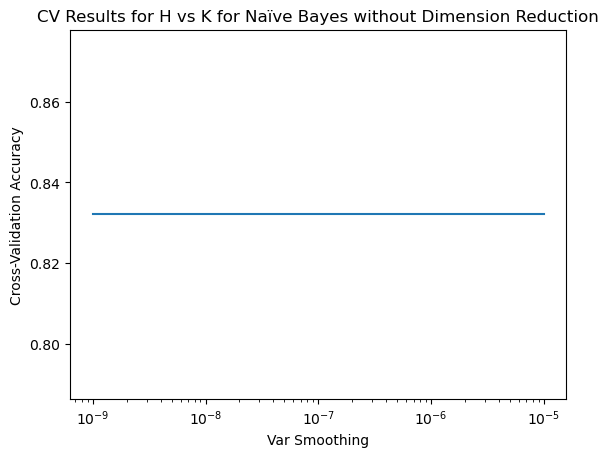

Validation Accuracy: 0.8851
Training Time: 0.22 seconds

CV Results for M vs Y for Naïve Bayes without Dimension Reduction
                     params  mean_test_score  rank_test_score
0  {'var_smoothing': 1e-09}         0.968309                1
1  {'var_smoothing': 1e-08}         0.968309                1
2  {'var_smoothing': 1e-07}         0.968309                1
3  {'var_smoothing': 1e-06}         0.968309                1
4  {'var_smoothing': 1e-05}         0.968309                1


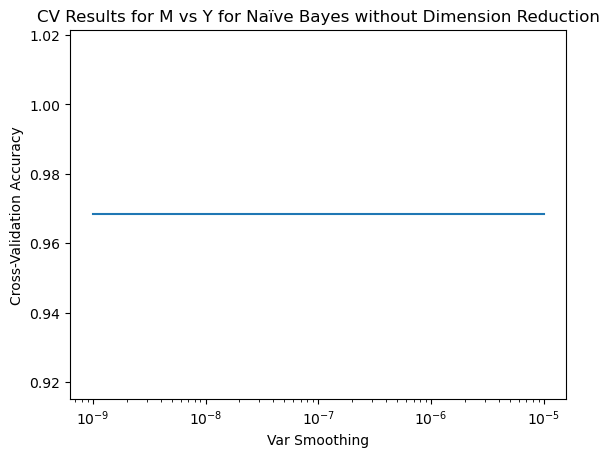

Validation Accuracy: 0.9557
Training Time: 0.25 seconds

CV Results for X vs O for Naïve Bayes without Dimension Reduction
                     params  mean_test_score  rank_test_score
0  {'var_smoothing': 1e-09}         0.894387                1
1  {'var_smoothing': 1e-08}         0.894387                1
2  {'var_smoothing': 1e-07}         0.894387                1
3  {'var_smoothing': 1e-06}         0.894387                1
4  {'var_smoothing': 1e-05}         0.894387                1


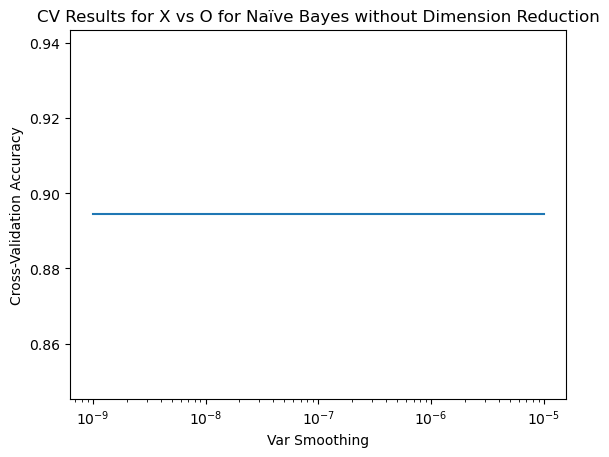

Validation Accuracy: 0.9221
Training Time: 0.21 seconds



In [11]:
from sklearn.naive_bayes import GaussianNB

# Function to perform hyperparameter tuning, training and plotting
def tune_train_and_plot(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Naïve Bayes Classifier
    nb = GaussianNB()
    grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')

    # Start timing
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for Naïve Bayes without Dimension Reduction")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting
    plt.plot(param_grid['var_smoothing'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Var Smoothing')
    plt.xscale("log") 
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for Naïve Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Tune, train and plot for each pair
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    tune_train_and_plot(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for Naïve Bayes without Dimension Reduction")

#### With dimensionality reduction

CV Results for H vs K for Naïve Bayes with PCA
                     params  mean_test_score  rank_test_score
0  {'var_smoothing': 1e-09}         0.784906                1
1  {'var_smoothing': 1e-08}         0.784906                1
2  {'var_smoothing': 1e-07}         0.784906                1
3  {'var_smoothing': 1e-06}         0.784906                1
4  {'var_smoothing': 1e-05}         0.784906                1


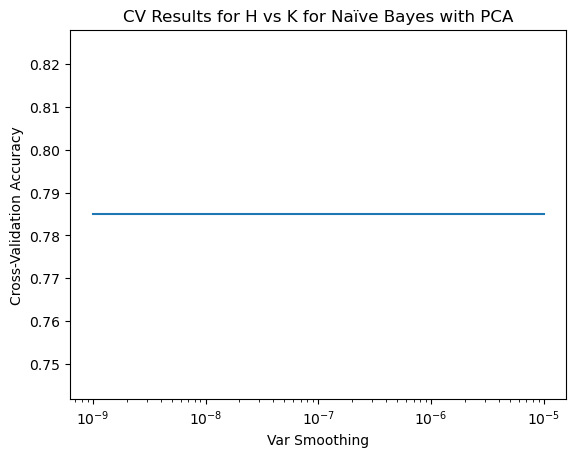

Validation Accuracy: 0.8446
Training Time: 0.13 seconds

CV Results for M vs Y for Naïve Bayes with PCA
                     params  mean_test_score  rank_test_score
0  {'var_smoothing': 1e-09}         0.964781                1
1  {'var_smoothing': 1e-08}         0.964781                1
2  {'var_smoothing': 1e-07}         0.964781                1
3  {'var_smoothing': 1e-06}         0.964781                1
4  {'var_smoothing': 1e-05}         0.964781                1


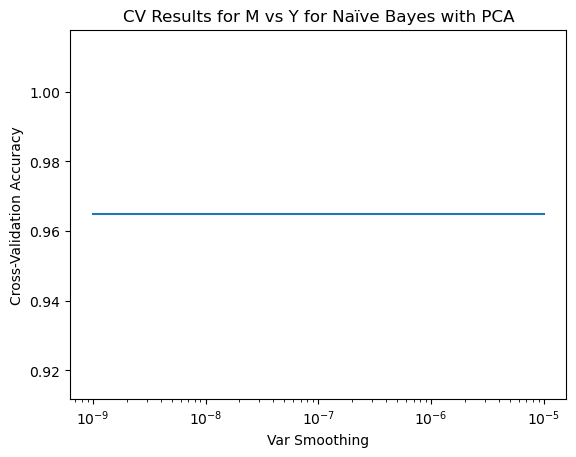

Validation Accuracy: 0.9873
Training Time: 0.12 seconds

CV Results for X vs O for Naïve Bayes with PCA
                     params  mean_test_score  rank_test_score
0  {'var_smoothing': 1e-09}          0.87186                1
1  {'var_smoothing': 1e-08}          0.87186                1
2  {'var_smoothing': 1e-07}          0.87186                1
3  {'var_smoothing': 1e-06}          0.87186                1
4  {'var_smoothing': 1e-05}          0.87186                1


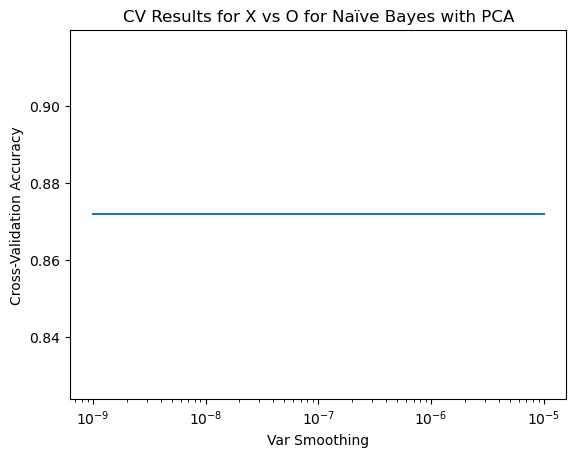

Validation Accuracy: 0.9026
Training Time: 0.13 seconds



In [12]:
# Function to perform hyperparameter tuning, training and plotting with PCA
def tune_train_and_plot_with_pca(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Apply PCA
    pca = PCA(n_components=4)
    X_train_cv_pca = pca.fit_transform(X_train_cv)
    X_val_pca = pca.transform(X_val)

    # Naïve Bayes Classifier
    nb = GaussianNB()
    grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')

    # Start timing
    start_time = time.time()
    grid_search.fit(X_train_cv_pca, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for Naïve Bayes with PCA")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting
    plt.plot(param_grid['var_smoothing'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Var Smoothing')
    plt.xscale("log") 
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    X_train_pca = pca.transform(X_train)
    best_estimator.fit(X_train_pca, y_train)
    val_predictions = best_estimator.predict(X_val_pca)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Tune, train and plot for each pair with PCA
for pair in pairs:
    tune_train_and_plot_with_pca(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for Naïve Bayes with PCA")

## 7. Use ***SVM*** to predict the letters.

#### Without dimensionality reduction

CV Results for H vs K for SVM without Dimension Reduction
                  params  mean_test_score  rank_test_score
1     {'kernel': 'poly'}         0.972642                1
2      {'kernel': 'rbf'}         0.954717                2
0   {'kernel': 'linear'}         0.924528                3
3  {'kernel': 'sigmoid'}         0.501887                4


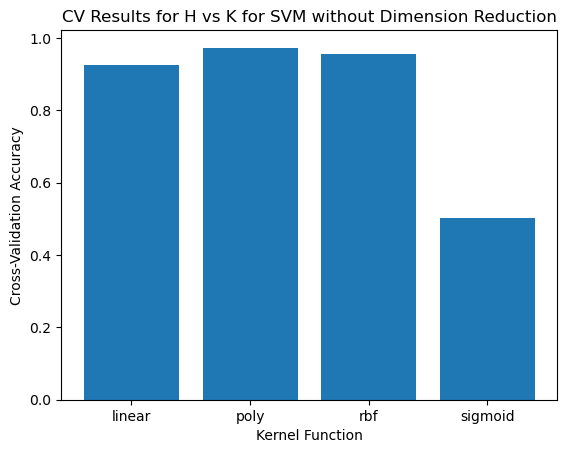

Validation Accuracy: 0.9865
Training Time: 0.92 seconds

CV Results for M vs Y for SVM without Dimension Reduction
                  params  mean_test_score  rank_test_score
2      {'kernel': 'rbf'}         0.997357                1
1     {'kernel': 'poly'}         0.995595                2
0   {'kernel': 'linear'}         0.993833                3
3  {'kernel': 'sigmoid'}         0.825779                4


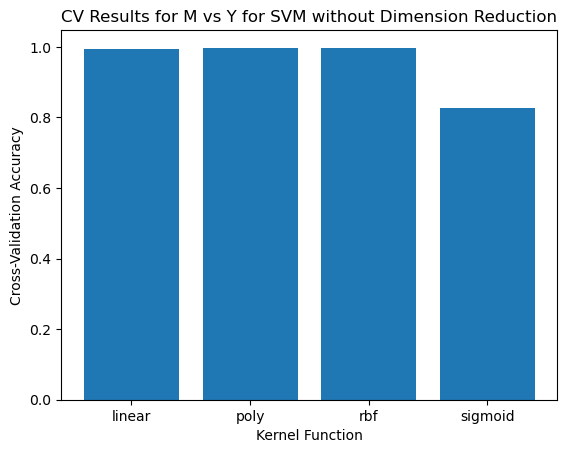

Validation Accuracy: 0.9937
Training Time: 0.66 seconds

CV Results for X vs O for SVM without Dimension Reduction
                  params  mean_test_score  rank_test_score
2      {'kernel': 'rbf'}         0.997297                1
1     {'kernel': 'poly'}         0.997293                2
0   {'kernel': 'linear'}         0.992789                3
3  {'kernel': 'sigmoid'}         0.520757                4


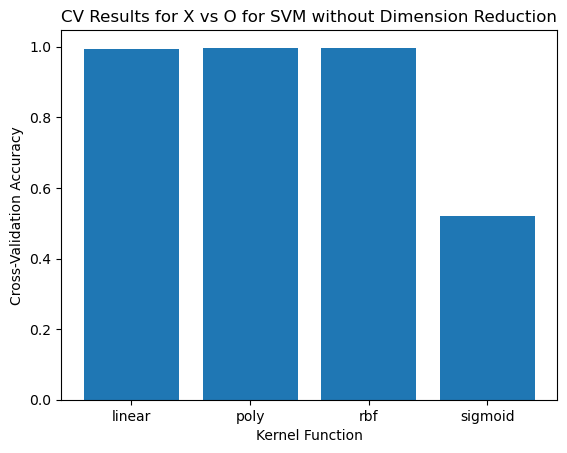

Validation Accuracy: 1.0000
Training Time: 0.67 seconds



In [13]:
from sklearn.svm import SVC

def tune_train_and_plot(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data into training and final validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

    # Further split the training data for cross-validation
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # SVM Classifier
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

    # Measure training time for complexity
    start_time = time.time()
    grid_search.fit(X_train_cv, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for SVM without Dimension Reduction")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])
    
    # Plotting (barplot for categoric variable)
    plt.bar(param_grid['kernel'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Kernel Function')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    best_estimator.fit(X_train, y_train)
    val_predictions = best_estimator.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

# Hyperparameter grid for SVM
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Tune, train and plot for each pair
pairs = [('H', 'K'), ('M', 'Y'), ('X', 'O')]
for pair in pairs:
    tune_train_and_plot(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for SVM without Dimension Reduction")

#### With dimensionality reduction

CV Results for H vs K for SVM with PCA
                  params  mean_test_score  rank_test_score
2      {'kernel': 'rbf'}         0.885849                1
1     {'kernel': 'poly'}         0.847170                2
0   {'kernel': 'linear'}         0.833962                3
3  {'kernel': 'sigmoid'}         0.717925                4


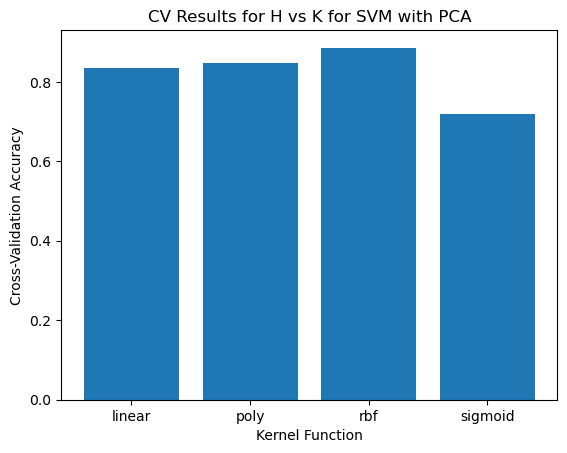

Validation Accuracy: 0.9257
Training Time: 0.70 seconds

CV Results for M vs Y for SVM with PCA
                  params  mean_test_score  rank_test_score
1     {'kernel': 'poly'}         0.977108                1
0   {'kernel': 'linear'}         0.976231                2
2      {'kernel': 'rbf'}         0.976227                3
3  {'kernel': 'sigmoid'}         0.931332                4


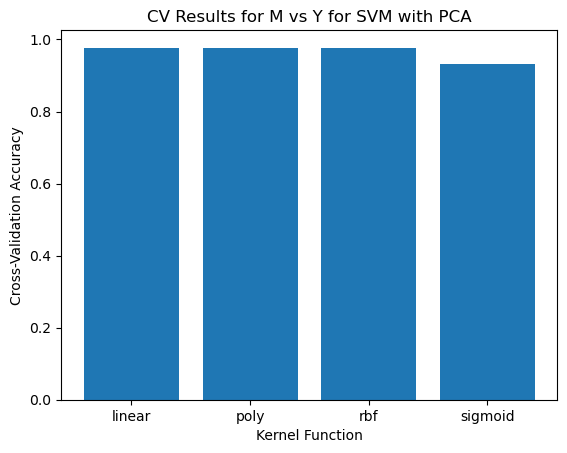

Validation Accuracy: 0.9873
Training Time: 0.30 seconds

CV Results for X vs O for SVM with PCA
                  params  mean_test_score  rank_test_score
2      {'kernel': 'rbf'}         0.953985                1
0   {'kernel': 'linear'}         0.931417                2
1     {'kernel': 'poly'}         0.900730                3
3  {'kernel': 'sigmoid'}         0.859247                4


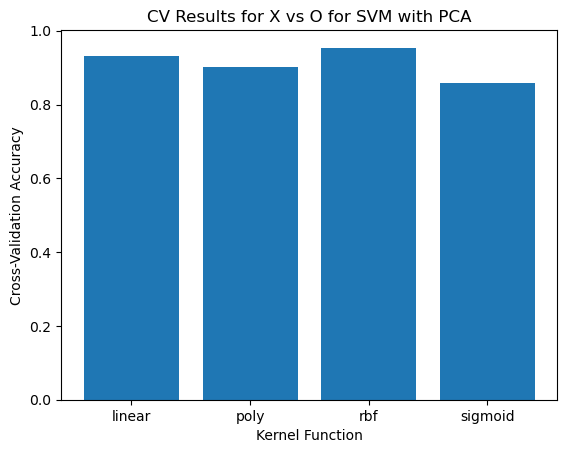

Validation Accuracy: 0.9675
Training Time: 0.42 seconds



In [14]:
# Function to perform hyperparameter tuning, training and plotting with PCA
def tune_train_and_plot_with_pca(data, pair, param_grid, plot_title):
    # Filter data for the specified pair
    binary_data = data[data[0].isin(pair)]
    X = binary_data.iloc[:, 1:]
    y = binary_data.iloc[:, 0]

    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Apply PCA
    pca = PCA(n_components=4)
    X_train_cv_pca = pca.fit_transform(X_train_cv)
    X_val_pca = pca.transform(X_val)

    # kNN Classifier
    svc = SVC()
    grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

    # Start timing
    start_time = time.time()
    grid_search.fit(X_train_cv_pca, y_train_cv)
    training_time = time.time() - start_time

    # Print the results of each hyperparameter combination
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results.sort_values('rank_test_score', inplace=True)
    print("CV Results for", pair[0], "vs", pair[1], "for SVM with PCA")
    print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

    # Plotting (barplot for categoric variable)
    plt.bar(param_grid['kernel'], grid_search.cv_results_['mean_test_score'])
    plt.xlabel('Kernel Function')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(plot_title)
    plt.show()

    # Retrain the best model on the full training set and evaluate on the validation set
    best_estimator = grid_search.best_estimator_
    X_train_pca = pca.transform(X_train)
    best_estimator.fit(X_train_pca, y_train)
    val_predictions = best_estimator.predict(X_val_pca)
    val_accuracy = accuracy_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print()

for pair in pairs:
    tune_train_and_plot_with_pca(data, pair, param_grid, f"CV Results for {pair[0]} vs {pair[1]} for SVM with PCA")